In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./data_banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
X = np.array(df[["variance", "skewness"]])
y = df["class"]

<h3>Standarize Dataset:</h3>

In [4]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X - mean)/std

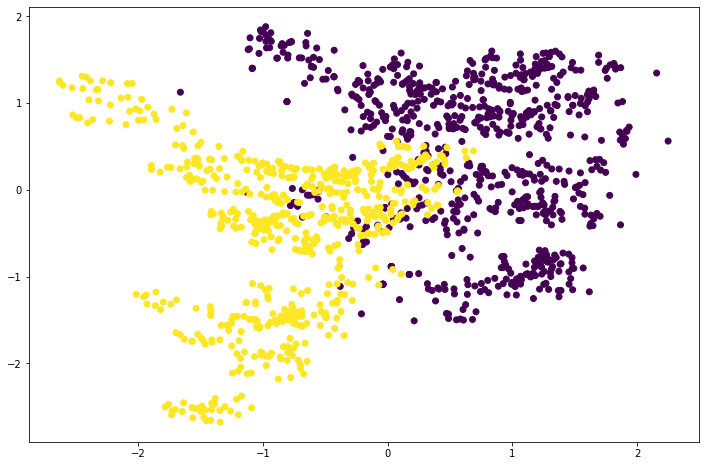

In [5]:
df_tmp = pd.DataFrame(X)
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.scatter(df_tmp[0], df_tmp[1], c = y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<h3>Use the perceptron Algorithm:</h3>

In [7]:
from Adaline import Adaline

adaline = Adaline()
adaline.fit(np.array(X_train), np.array(y_train))

In [8]:
adaline.weights

array([-0.38191968, -0.16831601])

In [9]:
y_pred = adaline.predict(np.array(X_test))

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.850909090909091

C:\Users\mirae\AppData\Local\Temp/ipykernel_19616/3426851526.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'k-', color="red")


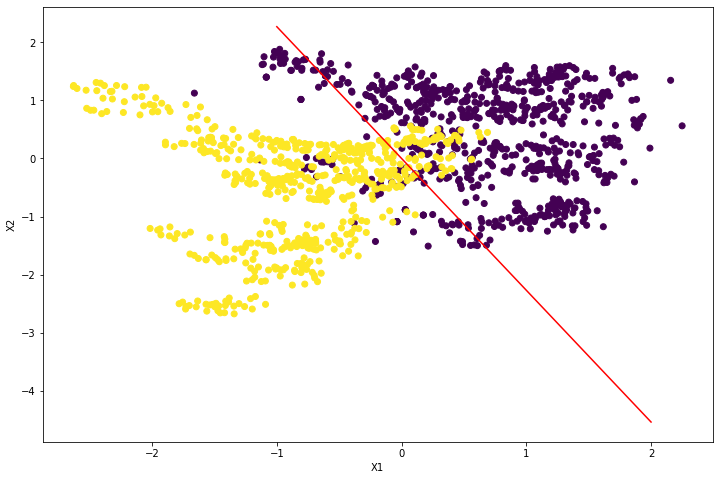

In [11]:
ymin, ymax = -1,2
a = -adaline.weights[0] / adaline.weights[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (adaline.bias) / adaline.weights[1]


# plotting the decision boundary
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.scatter(df_tmp[0], df_tmp[1], c = y)
plt.plot(xx, yy, 'k-', color="red")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()